# Oriented Graph

## Features
- Display graph
- Display graph's adjacency matrix
- Show shortest path from node A to node B
- Show longest path from node A to node B assuming that graph is DAG
- Show all paths from node A to node B sorted by weight sum
- Show center of directed graph 

# Code

### Imports

In [1]:
# Graph
import networkx as nx
# Arrays
import numpy as np 
# Matrices
import pandas

from matplotlib import pyplot as plt

## Graph creation

### Initialize graph

In [2]:
G = nx.DiGraph()

### Add nodes

In [3]:
# Add nodes
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')

### Add edges

In [4]:
# Add edges
G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'E', weight=3)
G.add_edge('C', 'D', weight=8)
G.add_edge('E', 'F', weight=4)
G.add_edge('D', 'F', weight=2)
G.add_edge('B', 'D', weight=4)
G.add_edge('E', 'D', weight=4)

# G.add_edge('D', 'A', weight=6)
# G.add_edge('F', 'A', weight=12)

### Set custom nodes position by x,y (optional)

In [5]:
Node_pos = {'A':(1,2),'B':(2,3),'C':(2,1),'D':(3,1),'E':(4,3),'F':(5,1)}

## Function to show graph's adjacency matrix

In [6]:
def adjmatrix(graph=G): 
    return pandas.DataFrame(nx.to_numpy_array(graph), columns=graph.nodes, index=graph.nodes)

## Functions to draw graphs

In [7]:
def draw_graph(graph=G):
    nx.draw_networkx(graph, with_labels = True, font_color = 'white', node_shape = 's')
    
def draw_wgraph(graph=G):
    plt.figure()
    pos = nx.spring_layout(graph)
    weight_labels = nx.get_edge_attributes(graph,'weight')
    nx.draw_networkx(graph,pos,font_color = 'white', node_shape = 's', with_labels = True,)
    nx.draw_networkx_edge_labels(graph, pos,edge_labels=weight_labels)
    
def show_wgraph(custom_node_positions=None):
    plt.figure() 
    
    if custom_node_positions==None:
        pos = nx.spring_layout(G)
    else:
        pos=custom_node_positions
        
    weight_labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx(G,pos,font_color = 'white', node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

## Function to draw paths from node A to node B in graph

In [8]:
# Show path in graph G
# Optionally enter custom node positions
def show_wpath_d(path, custom_node_positions=None):
    plt.figure() 
    
    if custom_node_positions==None:
        pos = nx.spring_layout(G)
    else:
        pos=custom_node_positions
    
    weight_labels = nx.get_edge_attributes(G,'weight')

    edges_path = list(zip(path,path[1:]))
    edges_path_reversed = [(y,x) for (x,y) in edges_path]
    edges_path = edges_path + edges_path_reversed
    edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]

    nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]
    nx.draw(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
    nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

# Debug
# show_wpath_d('A','F',node_pos)

## Function to show vertice in graph

In [9]:
def show_vertice(v, custom_node_positions=None):
    plt.figure()
    
    if custom_node_positions==None:
        pos = nx.spring_layout(G)
    else:
        pos=custom_node_positions
        
    weight_labels = nx.get_edge_attributes(G,'weight')
    
    nodecol = ['steelblue' if not node==v else 'red' for node in G.nodes()]
    nx.draw(G, pos, with_labels = True, font_color = 'white', node_shape = 's', node_color = nodecol)    
    nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

## Functions to get shortest path of graph

In [10]:
# Get shortes path of graph
def shortest_path(source, target, graph=G):
    return nx.dijkstra_path(graph, source = source, target = target)

# Debug
# shortest_path('A', 'D')

## Function to get longest path of graph

In [11]:
# Get longest path of graph
def longest_path(source, target, graph=G):
    H = nx.Graph(graph)
    
    longest_path=""
    largest_sum=0
    for path in nx.all_simple_paths(G, source, target):
        if (sum_path(path)>largest_sum):
            longest_path=path
            largest_sum=sum_path(path)
    return longest_path

# Get path sum
def sum_path(path, graph=G):
    sum = 0
    for i in range (0, len(path)-1):
        # print(G[path[i]][path[i+1]])
        sum += G[path[i]][path[i+1]]['weight']
    return sum

# Debug
# sum_path(longest_path('A', 'D'))
# longest_path('A', 'D')

## Function to get graph's center

In [12]:
def graph_center(graph=G):
    min_eccentr = float('inf')
    min_node = None
    
    for v in graph:
        eccentr = eccentricity(v)
        # print(v, eccentr)
        if eccentr == -float('inf'):
            continue
        elif eccentr < min_eccentr or min_eccentr == "inf":
            min_node = v
            min_eccentr = eccentricity(v)
            
    return min_node

def eccentricity(v, graph=G):
    sum = -float('inf')
    for u in graph:
        # print(sum_path(longest_path(v, u)))
        # print(longest_path(v, u))
        try:
            # print(shortest_path(u, v))
            if len(shortest_path(u, v)) == 1:
                continue
            sum = max(sum, sum_path(shortest_path(u, v)))
        except:
            continue
    return sum

# Debug
# print(eccentricity('C'))
# print(eccentricity('F'))
# eccentricity()
# graph_center()

## Function to print all paths from node A to node B increasing

In [13]:
def all_paths_sorted(source, target, graph=G):
    paths = list(nx.all_simple_paths(graph, source, target))
    
    for i in range(0, len(paths)):
        min_path = i
        for j in range(i, len(paths)):
            if sum_path(paths[j]) < sum_path(paths[min_path]):
                min_path = j
        print(paths[min_path], "sum =", sum_path(paths[min_path]))
        paths[min_path]=paths[i]

# Laboratory work

## Draw graph and it's adjacency matrix

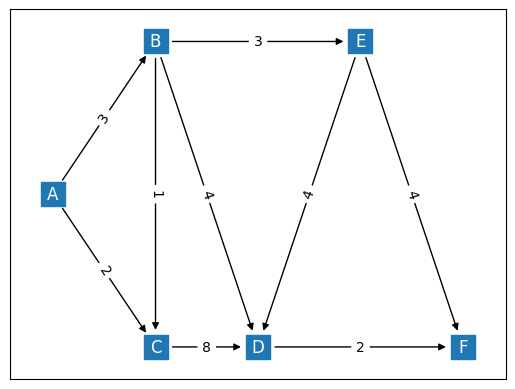

In [14]:
show_wgraph(Node_pos)

In [15]:
adjmatrix()

,A,B,C,D,E,F
A,0.0,3.0,2.0,0.0,0.0,0.0
B,0.0,0.0,1.0,4.0,3.0,0.0
C,0.0,0.0,0.0,8.0,0.0,0.0
D,0.0,0.0,0.0,0.0,0.0,2.0
E,0.0,0.0,0.0,4.0,0.0,4.0
F,0.0,0.0,0.0,0.0,0.0,0.0


## Shortest path between node A and node B

In [16]:
# Initialize node A
Node_A = 'A'

# Initialize node B
Node_B = 'D'

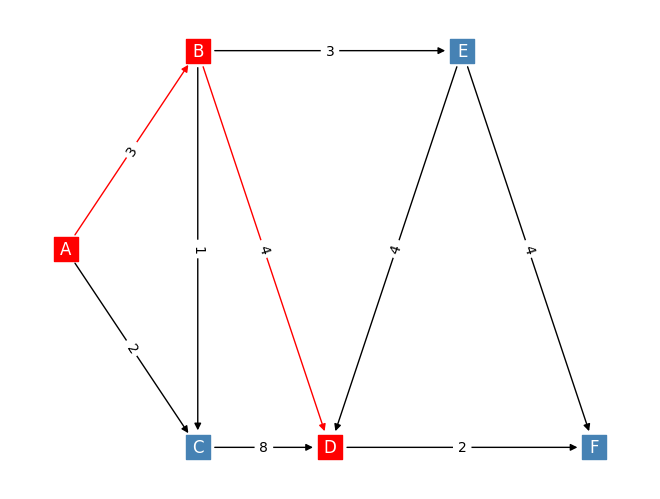

In [17]:
# Get shortest path
Path = shortest_path(Node_A, Node_B)

# Draw path
show_wpath_d(Path, Node_pos)

## Longest path between node A and node B

In [18]:
# Initialize node A
Node_A = 'A'

# Initialize node B
Node_B = 'D'

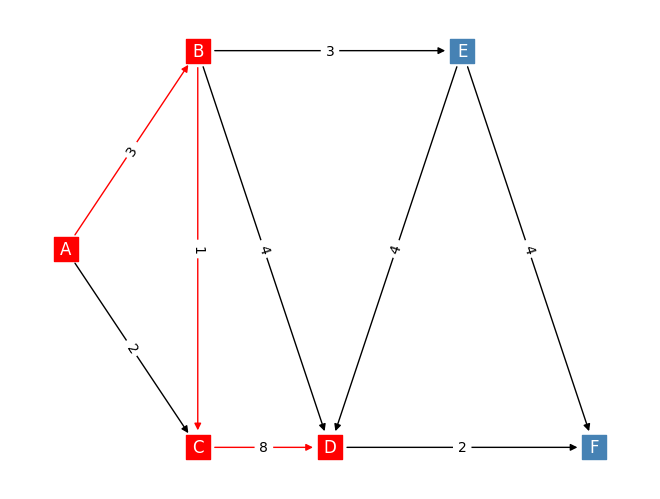

In [19]:
# Get longest path
Path = longest_path(Node_A, Node_B)

# Draw path
show_wpath_d(Path, Node_pos)

## Center of directed graph

A : Eccentricity = -inf
B : Eccentricity = 3
C : Eccentricity = 2
D : Eccentricity = 8
E : Eccentricity = 6
F : Eccentricity = 10


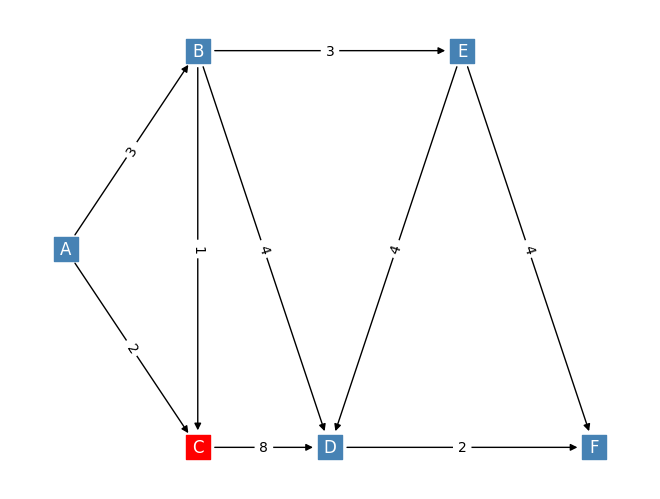

In [20]:
for u in G:
    print(u, ": Eccentricity =", eccentricity(u))
show_vertice(graph_center(), Node_pos)

## All paths sorted

In [21]:
# Initialize node A
Node_A = 'A'

# Initialize node B
Node_B = 'D'

In [22]:
all_paths_sorted(Node_A, Node_B)

['A', 'B', 'D'] sum = 7
['A', 'B', 'E', 'D'] sum = 10
['A', 'C', 'D'] sum = 10
['A', 'B', 'C', 'D'] sum = 12
